# Section 1: Load and Prepare Data

In [8]:
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\\Users\\Acer\\Desktop\\Data Analysis\\data\\telco.csv")


# Section 2: Exploratory Data Analysis (EDA) Visualizations

In [46]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [48]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


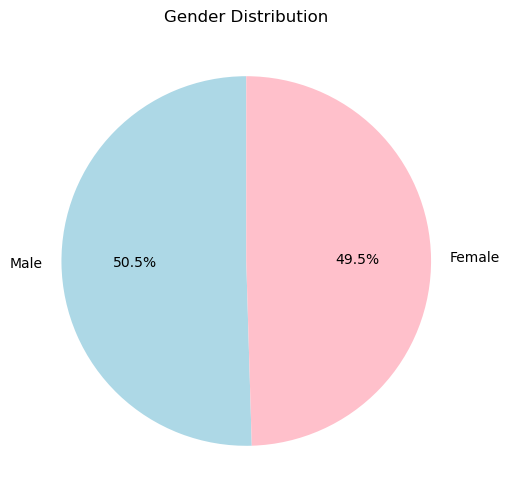

In [13]:
# Insight: Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Gender Distribution')
plt.show()


<Figure size 800x600 with 0 Axes>

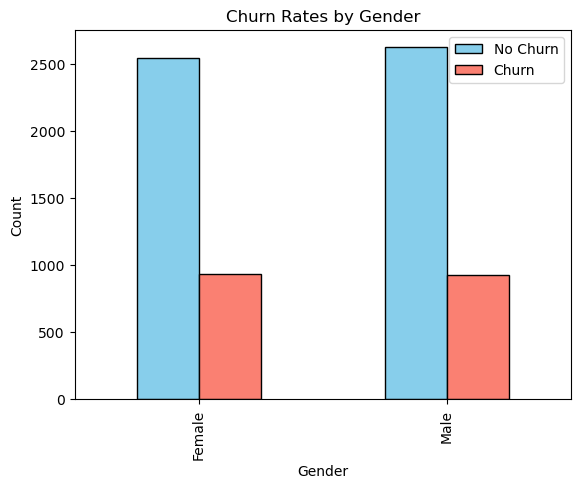

In [15]:
# Insight: Churn Rates by Gender
plt.figure(figsize=(8, 6))
gender_churn = df.groupby(['gender', 'Churn']).size().unstack()
gender_churn.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Churn Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['No Churn', 'Churn'])
plt.show()

<Figure size 800x600 with 0 Axes>

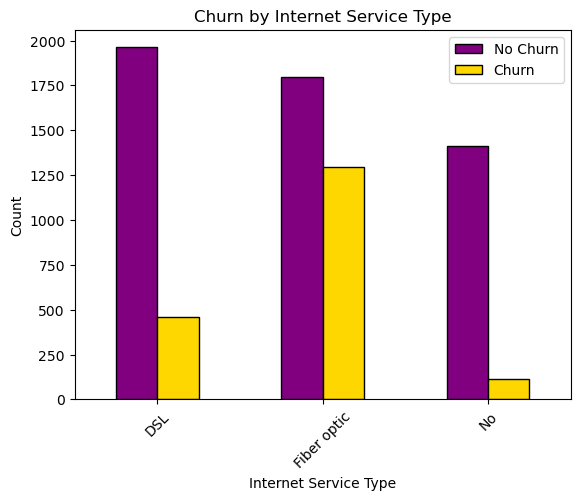

In [17]:
# Insight: Churn by Internet Service Type
plt.figure(figsize=(8, 6))
internet_service_churn = df.groupby(['InternetService', 'Churn']).size().unstack()
internet_service_churn.plot(kind='bar', color=['purple', 'gold'], edgecolor='black')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['No Churn', 'Churn'])
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_6120\4134864711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')


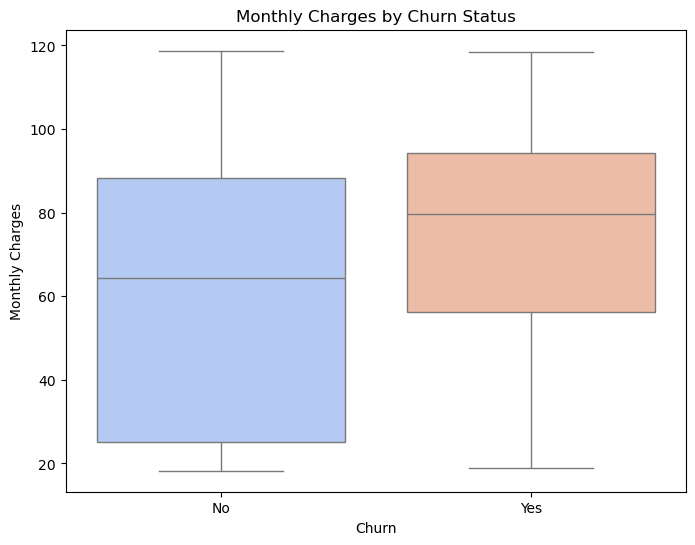

In [19]:
# Insight: Monthly Charges by Churn Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

<Figure size 800x600 with 0 Axes>

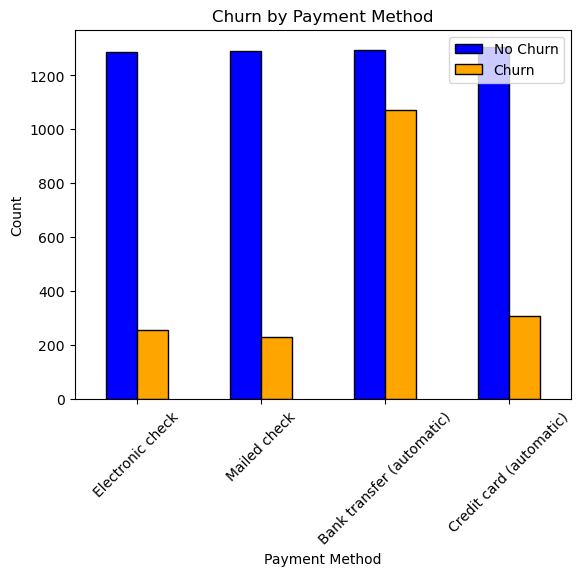

In [21]:
# Insight: Churn by Payment Method
plt.figure(figsize=(8, 6))
payment_method_churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack()
payment_method_churn.index = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
payment_method_churn.plot(kind='bar', color=['blue', 'orange'], edgecolor='black')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['No Churn', 'Churn'])
plt.show()

<Figure size 800x600 with 0 Axes>

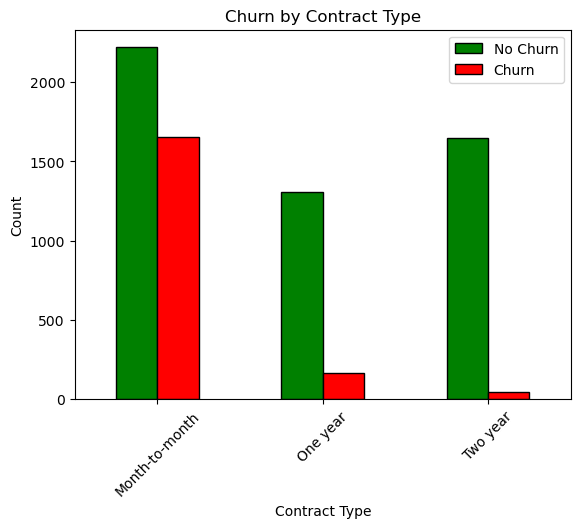

In [23]:
# Insight: Churn by Contract Type
plt.figure(figsize=(8, 6))
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()
contract_churn.plot(kind='bar', color=['green', 'red'], edgecolor='black')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['No Churn', 'Churn'])
plt.show()

<Figure size 800x600 with 0 Axes>

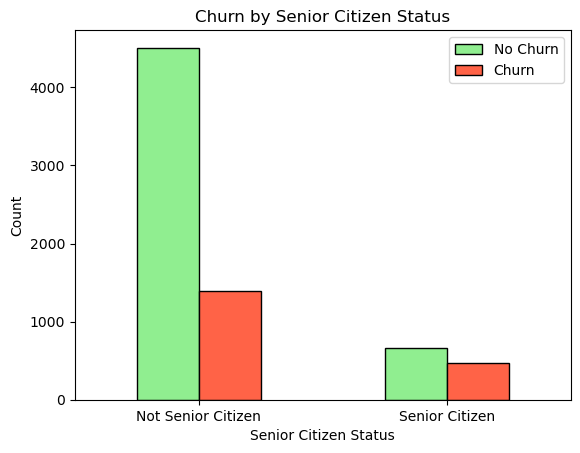

In [38]:
# Insight: Churn by Senior Citizen Status
plt.figure(figsize=(8, 6))
senior_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
senior_churn.index = ['Not Senior Citizen', 'Senior Citizen']
senior_churn.plot(kind='bar', color=['lightgreen', 'tomato'], edgecolor='black')
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No Churn', 'Churn'])
plt.show()

# Section 3: Preprocess Data

In [26]:
# Insight: Define the target column
target_column = 'Churn'

# Encode categorical variables
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Ensure no non-numeric columns exist
for col in X.columns:
    if X[col].dtype == 'object':
        raise ValueError(f"Column '{col}' is not numeric. Ensure all features are numeric before applying SMOTE.")


# Section 4: Balance and Split Data

In [29]:
# I used SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Section 5: Train and Evaluate Model

Model Accuracy: 85.60%
Precision: 83.98%
Recall: 88.47%
F1-score: 86.17%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1021
           1       0.84      0.88      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



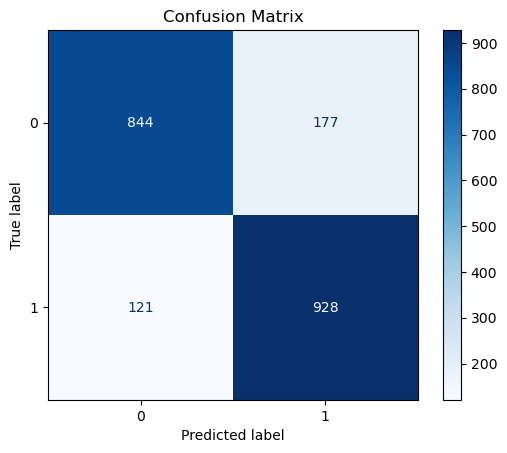

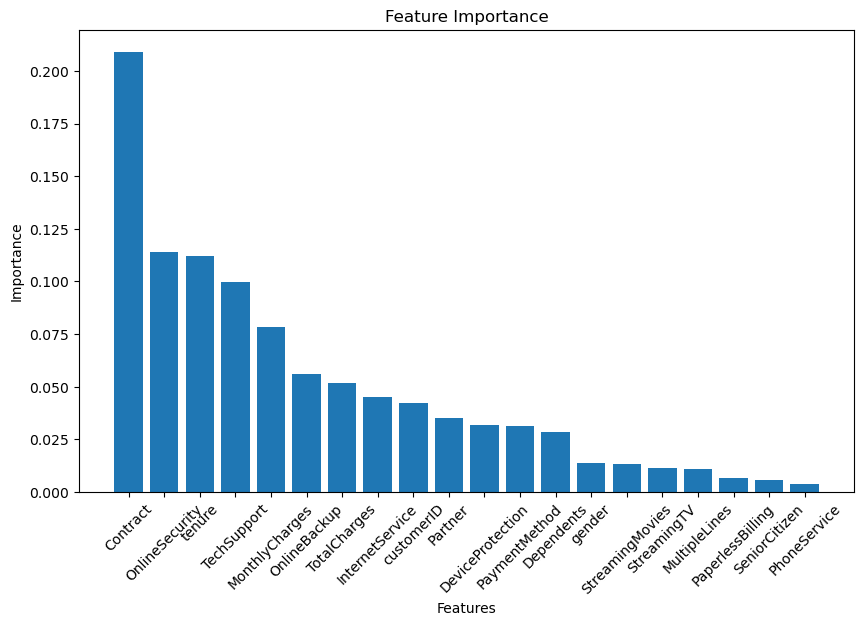

In [34]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier Model
model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Feature importance visualization
feature_names = X.columns
feature_importances = model.feature_importances_
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
